<a href="https://colab.research.google.com/github/Munazza-Farees/NITW-SIP2025-Project/blob/main/AKN_FGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install numpy scipy matplotlib scikit-learn pywavelets

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sl
import pywt
import matplotlib as plot
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
URL = "/content/drive/MyDrive/Colab Notebooks/Client1 (copy).csv"
data = pd.read_csv(URL)
data.head()

,Time,Source,Destination,Protocol,Length,Flags,Inter_Arrival_Time,Flow,Time_min,Time_max,...,Connection_Duration,Packet_Rate,Flow_Bytes_Per_Second,Flow_Packets_Per_Second,Forward_Packets,Backward_Packets,Ratio_Fwd_Bwd,Entropy,Packet_Size_Variance,Label
0,1.749548e+09,10.0.0.4,10.0.0.5,TCP,74,0x0002,NaN,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,...,61.056274,192.379902,57291.900970,192.379902,11746,11,1067.818182,1.389165,257925.244948,0
1,1.749548e+09,10.0.0.5,10.0.0.4,TCP,74,0x0012,0.000020,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,...,61.056282,0.180162,12.250992,0.180162,11,11746,0.000936,1.389165,257925.244948,0
2,1.749548e+09,10.0.0.4,10.0.0.5,TCP,67,0x0018,0.010389,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,...,61.056274,192.379902,57291.900970,192.379902,11746,11,1067.818182,1.389165,257925.244948,0
3,1.749548e+09,10.0.0.5,10.0.0.4,TCP,66,0x0010,0.000042,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,...,61.056282,0.180162,12.250992,0.180162,11,11746,0.000936,1.389165,257925.244948,0
4,1.749548e+09,10.0.0.4,10.0.0.5,TCP,66,0x0010,0.000028,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,...,61.056274,192.379902,57291.900970,192.379902,11746,11,1067.818182,1.389165,257925.244948,0


In [ ]:
# To drop or impute missing values
data = data.dropna()

In [ ]:
# Covert columns to correct data types
# Time -> Float or datetime
# Label -> integer
data['Time'] = data['Time'].astype(float)
data['Label'] = data['Label'].astype(int)

In [ ]:
data = pd.get_dummies(data, columns=['Protocol', 'Flags'])
# data.head()

In [ ]:
# Normalize or Standardize Features
# Min-Max scaling
columns = ['Length_mean', 'Length_std', 'Packet_Rate', 'Flow_Bytes_Per_Second']
top_features = ['Length', 'Length_mean', 'Length_std', 'Length_max', 'Length_min', 'Inter_Arrival_Time_mean', 'Inter_Arrival_Time_std', 'Flags'
                , 'Packet_Rate', 'Flow_Bytes_Per_Second', 'Entropy', 'Packet_Size_Variance']
features_to_scale = columns
scaler = MinMaxScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [ ]:
data.head()

,Time,Source,Destination,Length,Inter_Arrival_Time,Flow,Time_min,Time_max,Length_mean,Length_std,...,Packet_Size_Variance,Label,Protocol_TCP,Flags_0x0002,Flags_0x0010,Flags_0x0011,Flags_0x0012,Flags_0x0014,Flags_0x0018,Flags_0x0019
1,1.749548e+09,10.0.0.5,10.0.0.4,74,0.000020,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,0.010708,0.009011,...,257925.244948,0,True,False,False,False,True,False,False,False
2,1.749548e+09,10.0.0.4,10.0.0.5,67,0.010389,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,0.186480,0.019335,...,257925.244948,0,True,False,False,False,False,False,True,False
3,1.749548e+09,10.0.0.5,10.0.0.4,66,0.000042,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,0.010708,0.009011,...,257925.244948,0,True,False,True,False,False,False,False,False
4,1.749548e+09,10.0.0.4,10.0.0.5,66,0.000028,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,0.186480,0.019335,...,257925.244948,0,True,False,True,False,False,False,False,False
5,1.749548e+09,10.0.0.5,10.0.0.4,66,0.000007,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,0.010708,0.009011,...,257925.244948,0,True,False,True,False,False,False,False,False


In [ ]:
# Time Sorting
data = data.sort_values(by="Time").reset_index(drop=True)
data.head()

,Time,Source,Destination,Length,Inter_Arrival_Time,Flow,Time_min,Time_max,Length_mean,Length_std,...,Packet_Size_Variance,Label,Protocol_TCP,Flags_0x0002,Flags_0x0010,Flags_0x0011,Flags_0x0012,Flags_0x0014,Flags_0x0018,Flags_0x0019
0,1.749548e+09,10.0.0.5,10.0.0.4,74,0.000020,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,0.010708,0.009011,...,257925.244948,0,True,False,False,False,True,False,False,False
1,1.749548e+09,10.0.0.4,10.0.0.5,67,0.010389,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,0.186480,0.019335,...,257925.244948,0,True,False,False,False,False,False,True,False
2,1.749548e+09,10.0.0.5,10.0.0.4,66,0.000042,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,0.010708,0.009011,...,257925.244948,0,True,False,True,False,False,False,False,False
3,1.749548e+09,10.0.0.4,10.0.0.5,66,0.000028,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,0.186480,0.019335,...,257925.244948,0,True,False,True,False,False,False,False,False
4,1.749548e+09,10.0.0.5,10.0.0.4,66,0.000007,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,0.010708,0.009011,...,257925.244948,0,True,False,True,False,False,False,False,False


In [ ]:
# Split into Collection Windows (CW)
# Add a rolling time window group
cw_duration = 60 # in seconds
start_time = data['Time'].min()
data['CW_ID'] = ((data['Time'] - start_time) // cw_duration).astype(int)
data.head()

,Time,Source,Destination,Length,Inter_Arrival_Time,Flow,Time_min,Time_max,Length_mean,Length_std,...,Label,Protocol_TCP,Flags_0x0002,Flags_0x0010,Flags_0x0011,Flags_0x0012,Flags_0x0014,Flags_0x0018,Flags_0x0019,CW_ID
0,1.749548e+09,10.0.0.5,10.0.0.4,74,0.000020,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,0.010708,0.009011,...,0,True,False,False,False,True,False,False,False,0
1,1.749548e+09,10.0.0.4,10.0.0.5,67,0.010389,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,0.186480,0.019335,...,0,True,False,False,False,False,False,True,False,0
2,1.749548e+09,10.0.0.5,10.0.0.4,66,0.000042,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,0.010708,0.009011,...,0,True,False,True,False,False,False,False,False,0
3,1.749548e+09,10.0.0.4,10.0.0.5,66,0.000028,10.0.0.4->10.0.0.5,1.749548e+09,1.749548e+09,0.186480,0.019335,...,0,True,False,True,False,False,False,False,False,0
4,1.749548e+09,10.0.0.5,10.0.0.4,66,0.000007,10.0.0.5->10.0.0.4,1.749548e+09,1.749548e+09,0.010708,0.009011,...,0,True,False,True,False,False,False,False,False,0


In [ ]:
# Decide number of DUs per CW
du_splits = 10 # 10 DUs per CW
data['DU_ID'] = -1 # placeholder

for cw_id, group in data.groupby('CW_ID'):
  if group['Label'].nunique() == 1 or len(group) < du_splits:
    # Not enough data to split or not stratification possible
    group['DU_ID'] = [f"{cw_id}_0"] * len(group)
  else:
    skf = StratifiedKFold(n_splits=du_splits, shuffle=True, random_state=42)
    for i, (_, test_idx) in enumerate(skf.split(group, group['Label'])):
        du_label = f"{cw_id}_{i}"
        data.loc[group.iloc[test_idx].index, 'DU_ID'] = du_label

<ipython-input-11-2591984601>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0_0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[group.iloc[test_idx].index, 'DU_ID'] = du_label


In [ ]:
# Optional: Drop DUs with very few packets (noise)
min_packets = 10
du_counts = data['DU_ID'].value_counts()
valid_dus = du_counts[du_counts > min_packets].index
data = data[data['DU_ID'].isin(valid_dus)]


<ipython-input-13-3260091979>:29: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  zscore(agg_df['Entropy_mean'])**2))


Accuracy: 0.764
F1 Score: 0.0


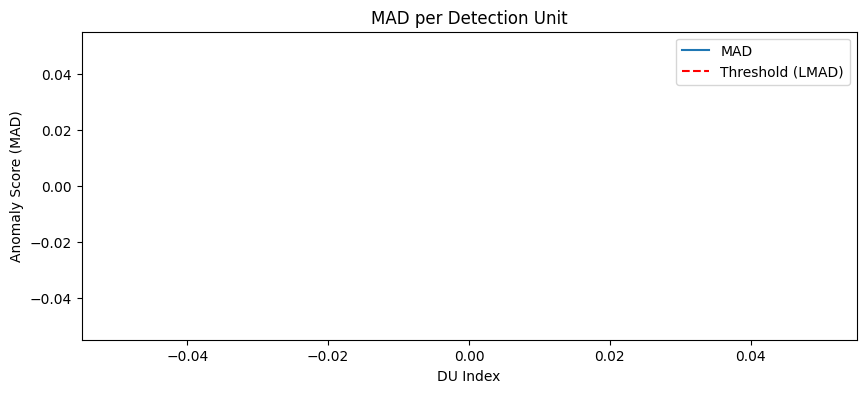

In [ ]:
# Step 1: Aggregate features per DU
agg_df = data.groupby('DU_ID').agg({
    'Length_mean': ['mean', 'std'],
    'Inter_Arrival_Time': ['mean', 'std'],
    'Packet_Rate': 'mean',
    'Flow_Bytes_Per_Second': 'mean',
    'Entropy': 'mean',
    'Label': lambda x: x.mode()[0]  # or x.mean() if you want % of attacks
})
agg_df.columns = ['_'.join(col) for col in agg_df.columns]
agg_df.reset_index(inplace=True)

# Step 2: Feature selection & scaling
features = ['Length_mean_mean', 'Length_mean_std', 'Inter_Arrival_Time_mean',
            'Inter_Arrival_Time_std', 'Packet_Rate_mean',
            'Flow_Bytes_Per_Second_mean', 'Entropy_mean']
X = agg_df[features].copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Clustering (placeholder for AKN)
kmeans = KMeans(n_clusters=2, random_state=42)
agg_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Compute MAD (Multivariate Anomaly Degree)
# Here we simulate MAD using z-score on chosen features (simplified)
agg_df['MAD'] = np.sqrt((zscore(agg_df['Length_mean_std'])**2 +
                         zscore(agg_df['Inter_Arrival_Time_std'])**2 +
                         zscore(agg_df['Entropy_mean'])**2))

# Step 5: Set threshold (LMAD)
z_value = 1.96  # 97.5% confidence
LMAD = agg_df['MAD'].mean() + z_value * agg_df['MAD'].std()

# Step 6: Flag abnormal DUs
agg_df['Predicted_Label'] = (agg_df['MAD'] > LMAD).astype(int)

# Step 7: Evaluate
y_true = agg_df['Label_<lambda>']
y_pred = agg_df['Predicted_Label']
print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# Optional: Visualize MAD
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(agg_df['MAD'], label='MAD')
plt.axhline(y=LMAD, color='red', linestyle='--', label='Threshold (LMAD)')
plt.title("MAD per Detection Unit")
plt.xlabel("DU Index")
plt.ylabel("Anomaly Score (MAD)")
plt.legend()
plt.show()